# Data Visualization


### Introduction

Data visualization is perhaps the fastest and most useful way to summarize and learn more about your data. In particular, one common practice is the Univariate Visualization, i.e. the visualizations of single variables.
Univariate is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.
Univariate plots are plots of individual attributes without interactions. The goal is learn something about the distribution, central tendency and spread of each attributes.

The analysis of single variable allows to properly understand the variable distribution and behavior for a better intuition before to make more complex approaches/analysis

The data visualization can be done by using multiple type of data. Two very useful chart types are:
- bar chart for **qualitative** variables. It is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a line graph.
- histogram chart for **quantitative** variables. It is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable) and differs from a bar graph, in the sense that a bar graph relates two variables, but a histogram relates only one

### Tidy Data

A [tidy dataset](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) is a tabular dataset where:
- each variable is a column
- each observation is a row
- each type of observational unit is a table

Tipically, we work with datasets that are in a non-tidy representation and where each observation is a row

### Matplotlib & Seaborn

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.
For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
It closely integrated with pandas data structures.

Here is some of the functionality that seaborn offers:

- A dataset-oriented API for examining relationships between multiple variables
- Specialized support for using categorical variables to show observations or aggregate statistics
- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Automatic estimation and plotting of linear regression models for different kinds dependent variables
- Convenient views onto the overall structure of complex datasets
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes
- Tools for choosing color palettes that faithfully reveal patterns in your data

Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

### BarChart for Qualitative Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

In [2]:
pokemon_data = pd.read_csv('./data/pokemon.csv')

In [3]:
pokemon_data.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [4]:
pokemon_data.shape

(807, 14)

Show the counts of observations in each categorical bin using bars.

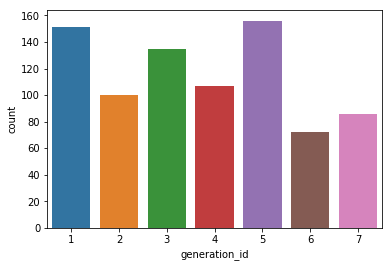

In [5]:
sb.countplot(data=pokemon_data, x='generation_id')

The returned bar char is composed by bars which differs in colors using the basic color palette provided by seaborn.

it's possibile to see the color palette by using the method `color_palette` which returns a list of colors defining a color palette.

In [6]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

if we want to use the first bar color for the entire chart we can use assing to a variable this color and pass it as parameter

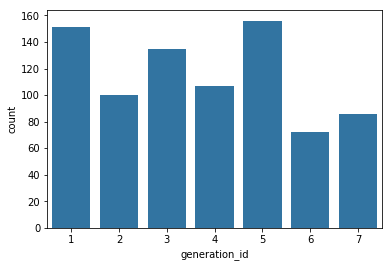

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon_data, x='generation_id', color=base_color)

we can ordered this values by using the `order`parameter of `countplot` function

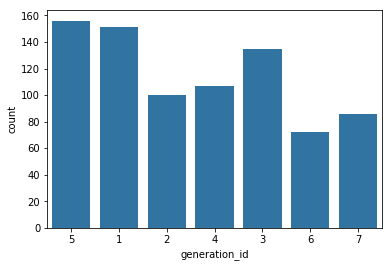

In [8]:
sb.countplot(data=pokemon_data, x='generation_id', color=base_color, order=[5,1,2,4,3,6,7])

 Conversaly, we can do that programmatically by using `value_counts` fun of Pandas which count the values for each category and descendingly orders them

In [9]:
order = pokemon_data['generation_id'].value_counts() 
order

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

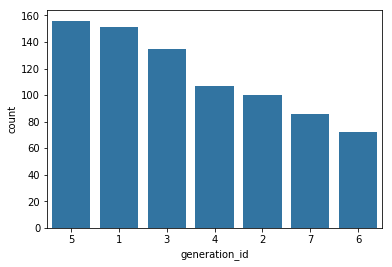

In [10]:
sb.countplot(data=pokemon_data, x='generation_id', color=base_color, order=order.index)

Let's now display the information on another feature such as type_1

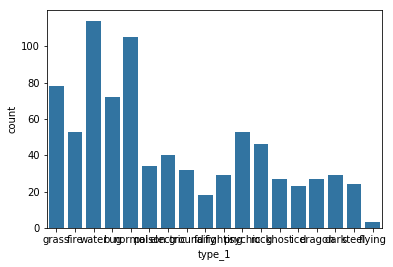

In [11]:
sb.countplot(data=pokemon_data, x='type_1', color=base_color)

As you can see the labels are unreadable. To fix this issue we can use a pyplot function `xticks(rotation=value)` 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

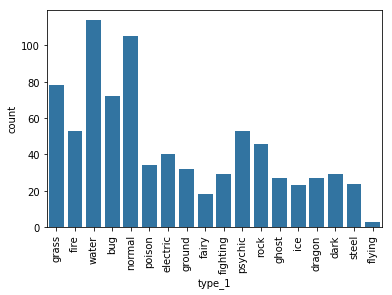

In [12]:
sb.countplot(data=pokemon_data, x='type_1', color=base_color)
plt.xticks(rotation=90)

Instead of an horizontal barchart, sometimes we need to use the vertical one. With Seaborn this operation is pretty simple because we just need to use the y parameter instead of x as follows

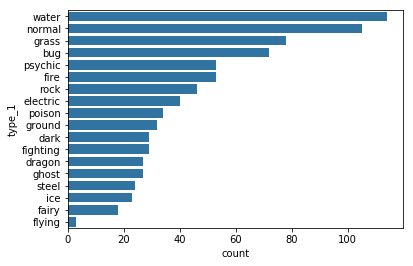

In [13]:
sb.countplot(data=pokemon_data, y='type_1', color=base_color, order=pokemon_data['type_1'].value_counts().index)